PCA Results:
Explained Variance Ratio:
Component 1: 0.2723
Component 2: 0.1423
Component 3: 0.1309
Component 4: 0.1088
Component 5: 0.0872
Component 6: 0.0748
Component 7: 0.0659
Component 8: 0.0588
Component 9: 0.0228
Component 10: 0.0171
Component 11: 0.0117
Component 12: 0.0068
Component 13: 0.0006
Component 14: 0.0001

Cumulative Explained Variance:
Up to Component 1: 0.2723
Up to Component 2: 0.4146
Up to Component 3: 0.5456
Up to Component 4: 0.6543
Up to Component 5: 0.7415
Up to Component 6: 0.8163
Up to Component 7: 0.8822
Up to Component 8: 0.9410
Up to Component 9: 0.9638
Up to Component 10: 0.9809
Up to Component 11: 0.9925
Up to Component 12: 0.9994
Up to Component 13: 0.9999
Up to Component 14: 1.0000

Confusion Matrix:
[[43  0  4]
 [ 0 55  5]
 [ 4  4 32]]

F1 Score: 0.8848103615343845


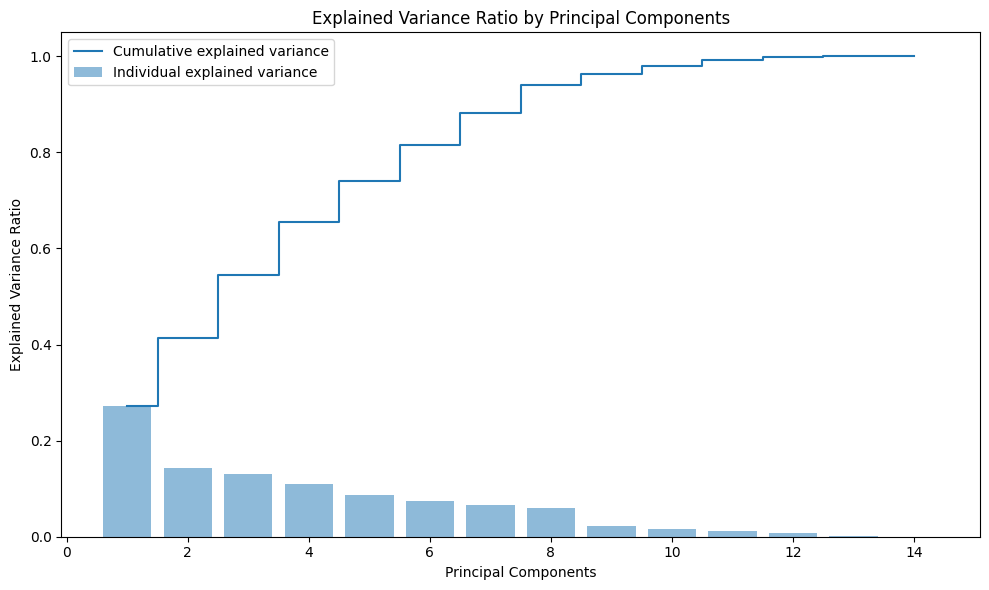

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

bikesDf = pd.read_csv("day.csv")

X = bikesDf.drop(columns=['cnt', 'dteday'])  
y = bikesDf['cnt']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

rental_bins = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])
X_train, X_test, y_train, y_test = train_test_split(X_pca, rental_bins, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("PCA Results:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f}")

print("\nCumulative Explained Variance:")
for i, cm_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to Component {i+1}: {cm_ratio:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)

# Visualization of PCA components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


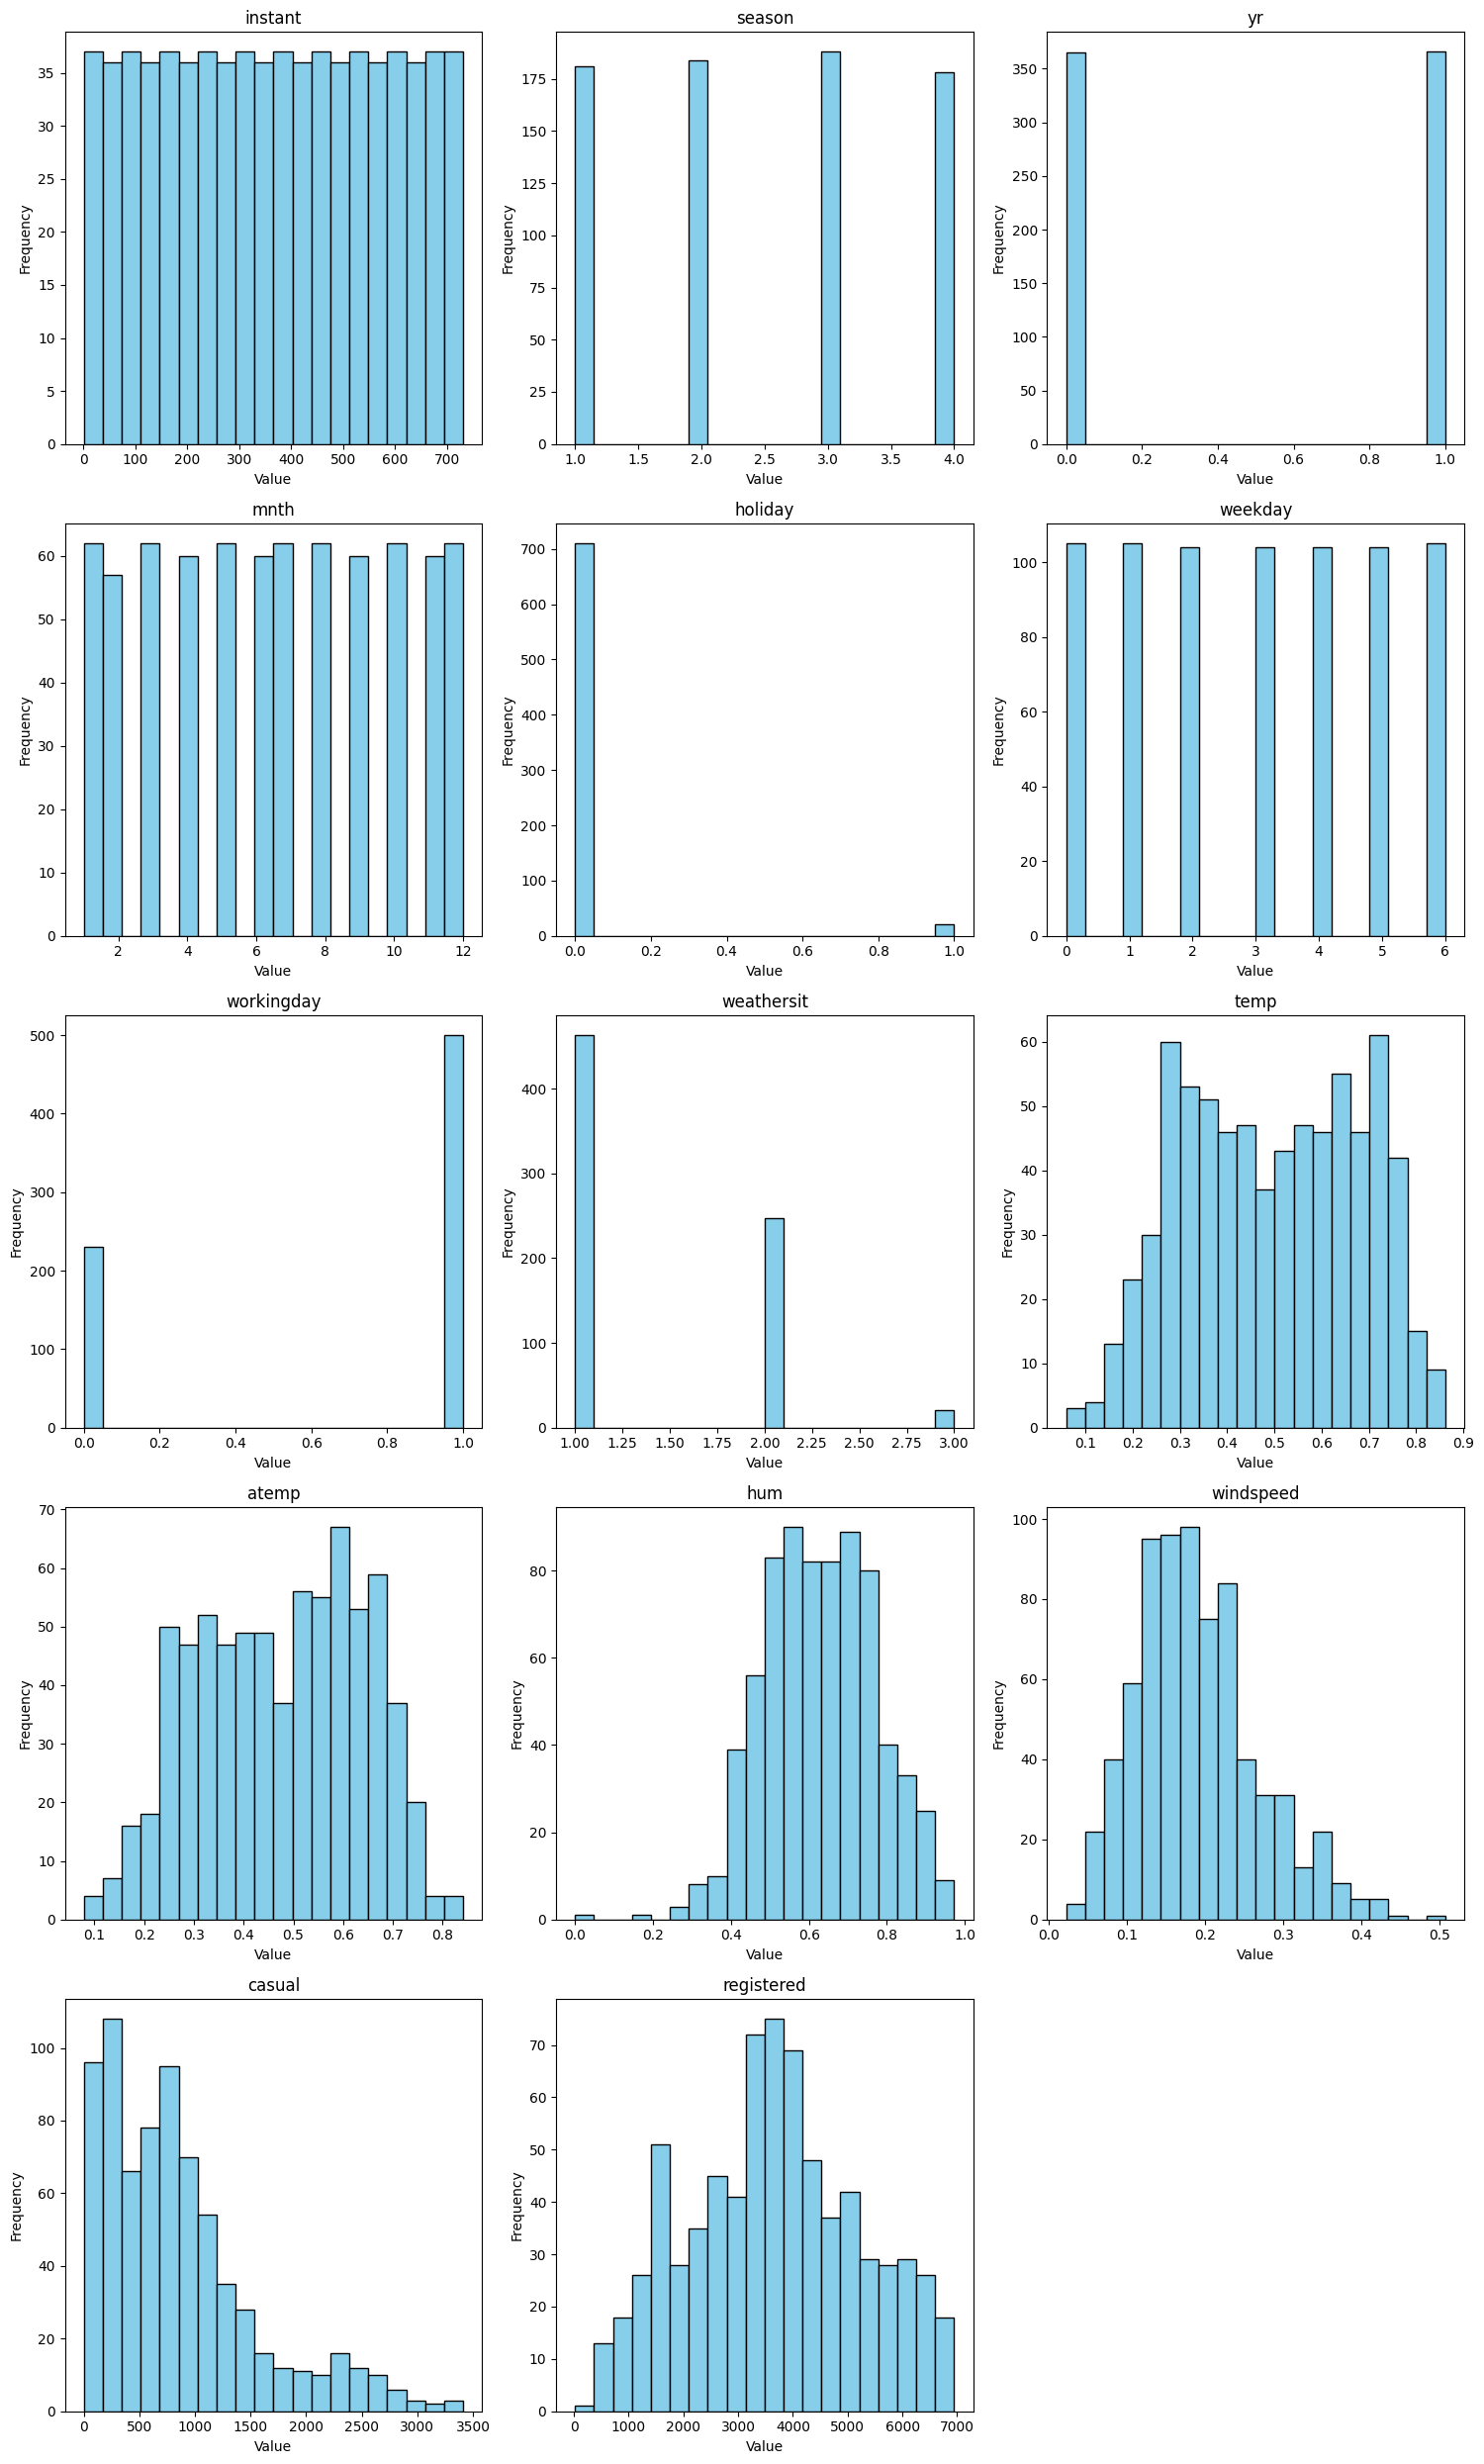

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Read the dataset
bikesDf = pd.read_csv("day.csv")

# Drop irrelevant columns
X = bikesDf.drop(columns=['cnt', 'dteday'])

# Calculate summary statistics
summary_stats = X.describe()

# Determine number of rows and columns for subplots
num_features = len(summary_stats.columns)
num_rows = math.ceil(num_features / 3)
num_cols = min(num_features, 3)

# Plot summary statistics
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(summary_stats.columns):
    ax = axes[i]
    ax.hist(X[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [3]:
print(bikesDf.describe())
print(bikesDf.columns.tolist())

          instant      season          yr        mnth     holiday     weekday   
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  \
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed   
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  \
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [19]:
# Perform PCA before splitting the data
pca = PCA(n_components=10)  # Choose the number of components
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Print the chosen components
print("Chosen Principal Components:")
for i in range(pca.components_.shape[0]):
    print(f"Principal Component {i+1}: {pca.components_[i]}")

# Train SVM on the PCA-transformed training data
svm = SVC()
svm.fit(X_pca_train, y_train)

# Predict labels for the transformed test data
y_pred = svm.predict(X_pca_test)

# Evaluate the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPCA + SVM Results:")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)


Chosen Principal Components:
Principal Component 1: [ 9.99623436e-01 -8.96865193e-03 -8.07123300e-03 -5.03307400e-03
 -1.09482907e-02  1.30492558e-02 -5.94552556e-03  1.17262504e-02
 -1.75633599e-03  6.55281144e-04 -1.00935508e-02 -3.65640257e-03
  6.99244100e-05  5.49324950e-04]
Principal Component 2: [ 8.38878856e-03  9.95655254e-01  5.40455463e-02 -6.31368701e-02
 -1.05325292e-02  1.94722987e-02  1.83842928e-02  2.74021051e-02
  3.22119249e-03  1.03087293e-03 -5.40531819e-03 -8.56078753e-03
 -1.50450305e-04  3.59592185e-04]
Principal Component 3: [-8.41578017e-03  5.40431880e-02 -9.93913071e-01  3.89085379e-02
 -7.21800070e-02  1.79053231e-02  4.11374853e-02  1.78284224e-02
  4.40844493e-03 -1.95651386e-04 -7.91523620e-03 -2.91264954e-03
  3.60552816e-04 -7.49179731e-05]
Principal Component 4: [ 7.08816728e-03  6.46972547e-02  3.81335546e-02  9.90531595e-01
  2.39129535e-03 -1.56354997e-02 -4.23337819e-02 -1.05368148e-01
 -3.68743247e-04  3.40319293e-03 -1.60944404e-04  6.29193728e-

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_pca_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Score:", best_score)

# Predict labels for the test data using the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_pca_test)

# Evaluate the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPCA + Optimized SVM Results:")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)
from sklearn.metrics import accuracy_score

# Calculate accuracy of the final model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)





Best Parameters: {'C': 100, 'gamma': 0.01}
Best Score: 0.9331859711170056

PCA + Optimized SVM Results:

Confusion Matrix:
[[46  0  1]
 [ 0 56  4]
 [ 3  1 36]]

F1 Score: 0.9390008140008143
Accuracy: 0.9387755102040817


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid with different kernel functions and other parameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [2, 3, 4], 
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_pca_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Score:", best_score)

# Predict labels for the test data using the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_pca_test)

# Evaluate the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nOptimized SVM Results:")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)

# Calculate accuracy of the final model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Best Parameters: {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
Best Score: 0.9486147951665191

Optimized SVM Results:

Confusion Matrix:
[[45  0  2]
 [ 0 55  5]
 [ 2  5 33]]

F1 Score: 0.9047619047619048
Accuracy: 0.9047619047619048


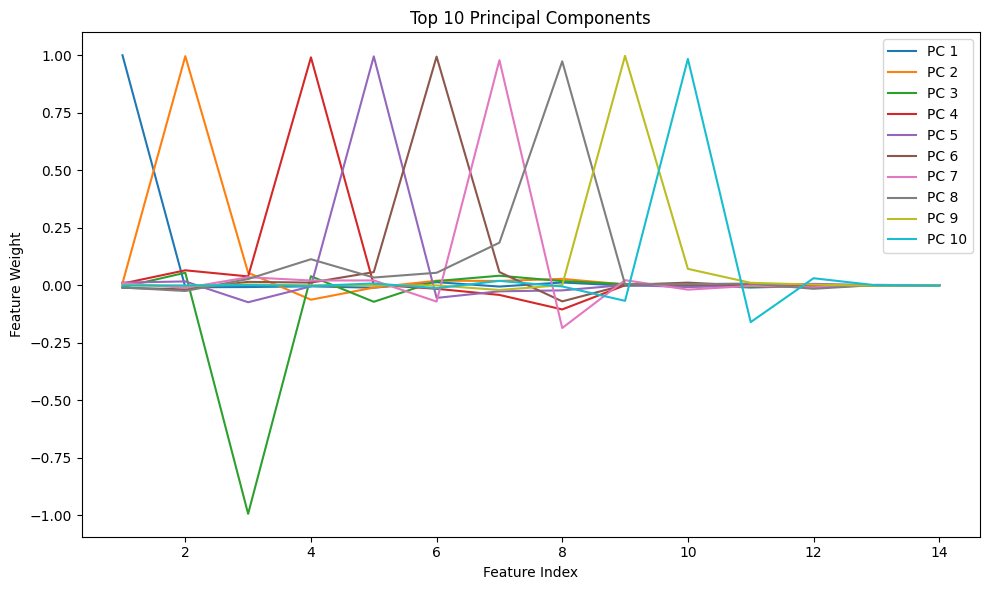

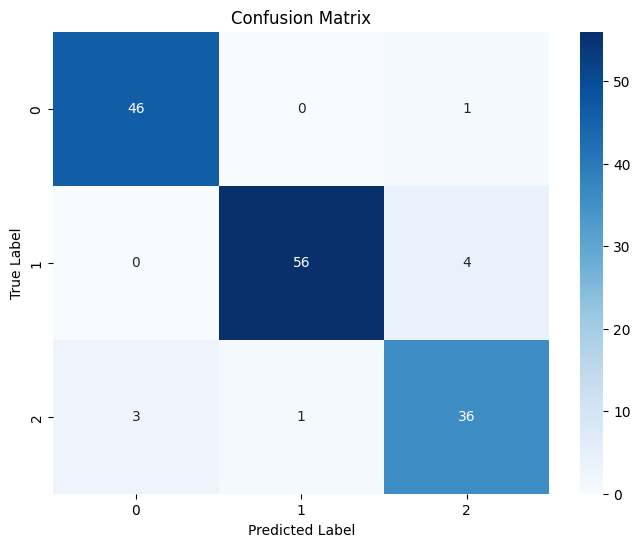

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for the top 10 principal components
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(range(1, len(pca.components_[i]) + 1), pca.components_[i], label=f'PC {i+1}')

plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.title('Top 10 Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Visualization for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
